<a href="https://colab.research.google.com/github/hamza-coding-cyber/data/blob/main/reultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset_final_cleaned.sav to dataset_final_cleaned.sav


In [2]:
# Installer la librairie s
!pip install pyreadstat

# Importer les bibliothèques
import pandas as pd
import pyreadstat

# Lire le fichier .sav
fichier_sav_entree = "dataset_final_cleaned.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# Liste des variables à garder
colonnes_a_garder = [
    'V1_2', 'V1_12', 'V1_13', 'V2_1B', 'V2_1C', 'V2_2_corrige', 'V2_2B_corrige',
    'V2_7A', 'V2_7B', 'V2_7C', 'V2_7D', 'V2_8_corrigé', 'V2_9A', 'V2_9B',
    'V2_10', 'V2_8A', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V3_1',
    'V3_12_corrige', 'V3_13', 'V3_14_corrige', 'V3_15_corrige', 'V3_18',
    'V4_1', 'V5_1AA'
]

# Filtrer uniquement les colonnes présentes
colonnes_existantes = [col for col in colonnes_a_garder if col in df.columns]
df_filtré = df[colonnes_existantes]


# Enregistrer en SAV
pyreadstat.write_sav(df_filtré, "dataset_filtré.sav")

# Télécharger les deux fichiers
from google.colab import files
files.download("dataset_filtré.sav")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 8.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Installer pyreadstat
!pip install pyreadstat

# Importer les bibliothèques
import pandas as pd
import pyreadstat

# Lire le fichier SPSS déjà importé
fichier_sav_entree = "dataset_final_cleaned.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# Filtrer : garder uniquement les personnes de 25 ans ou plus
df = df[df['V1_12'] >= 25]

# Liste des variables à garder (incluant V1_12 pour l'âge)
colonnes_a_garder = [
    'V1_2', 'V1_12', 'V1_13', 'V2_1B', 'V2_1C', 'V2_2_corrige', 'V2_2B_corrige',
    'V2_7A', 'V2_7B', 'V2_7C', 'V2_7D', 'V2_8_corrigé', 'V2_9A', 'V2_9B',
    'V2_10', 'V2_8A', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V3_1',
    'V3_12_corrige', 'V3_13', 'V3_14_corrige', 'V3_15_corrige', 'V3_18',
    'V4_1', 'V5_1AA'
]

# Garder uniquement les colonnes qui existent réellement dans le fichier
colonnes_existantes = [col for col in colonnes_a_garder if col in df.columns]
df_filtré = df[colonnes_existantes]

# Sauvegarder en CSV
df_filtré.to_csv("dataset_filtré_25plus.csv", index=False)

# Sauvegarder en SAV
pyreadstat.write_sav(df_filtré, "dataset_filtré_25plus.sav")

# Télécharger les fichiers
from google.colab import files
files.download("dataset_filtré_25plus.sav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

creation de la variables de vulnerabilité

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_filtré_25plus.sav to dataset_filtré_25plus (1).sav


In [16]:
import pandas as pd

# Charger les données
fichier_sav_entree = "dataset_final_cleaned.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# Variables binaires vulnérabilité (0 ou 1)
df['vul_sante_couverture']   = df['V4_1'].apply(lambda x: 1 if x == 2 else 0)
df['vul_sante_maladie']      = df['V5_1AA'].apply(lambda x: 1 if x == 1 else 0)
df['vul_edu_etude_actuelle'] = df['V2_7A'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_pas_etudie']     = df['V2_7C'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_aucun_diplome']  = df['V2_10'].apply(lambda x: 1 if x == 1 else 0)
df['vul_pas_de_travail']     = df['V3_1'].apply(lambda x: 1 if x == 2 else 0)

# Nombre de critères
n_criteres = 6

# Poids égaux pour chaque critère
poids_egal = 1 / n_criteres

# Calcul du score pondéré
df['score_vulnerabilite'] = (
    df['vul_sante_couverture'] * poids_egal +
    df['vul_sante_maladie'] * poids_egal +
    df['vul_edu_etude_actuelle'] * poids_egal +
    df['vul_edu_pas_etudie'] * poids_egal +
    df['vul_edu_aucun_diplome'] * poids_egal +
    df['vul_pas_de_travail'] * poids_egal
)

# Définir un seuil pour trancher (exemple: 0.3)
seuil = 0.3

# Variable binaire vulnérable ou non
df['vulnerable'] = df['score_vulnerabilite'].apply(lambda x: 1 if x >= seuil else 0)

# Affichage
print(df[['score_vulnerabilite', 'vulnerable']].head())


   score_vulnerabilite  vulnerable
0             0.166667           0
1             0.000000           0
2             0.166667           0
3             0.000000           0
4             0.000000           0


Répartition de la vulnérabilité:
   vulnerable  count  percentage
0           0  32497   94.125996
1           1   2028    5.874004

Fréquence des critères de vulnérabilité:
                                       Critère  Nombre vulnérable  Pourcentage
vul_sante_couverture      vul_sante_couverture                  0     0.000000
vul_sante_maladie            vul_sante_maladie               2847     8.246198
vul_edu_etude_actuelle  vul_edu_etude_actuelle                  0     0.000000
vul_edu_pas_etudie          vul_edu_pas_etudie                  0     0.000000
vul_edu_aucun_diplome    vul_edu_aucun_diplome              18961    54.919623
vul_pas_de_travail          vul_pas_de_travail                  0     0.000000


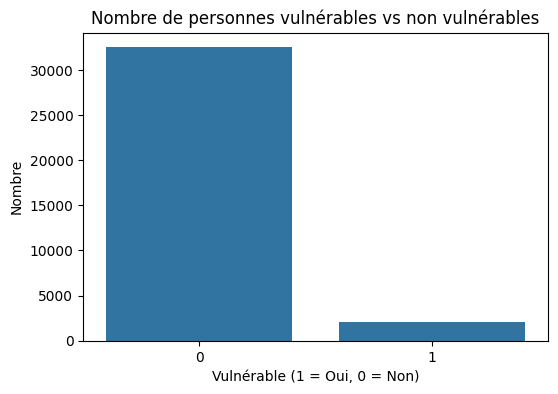

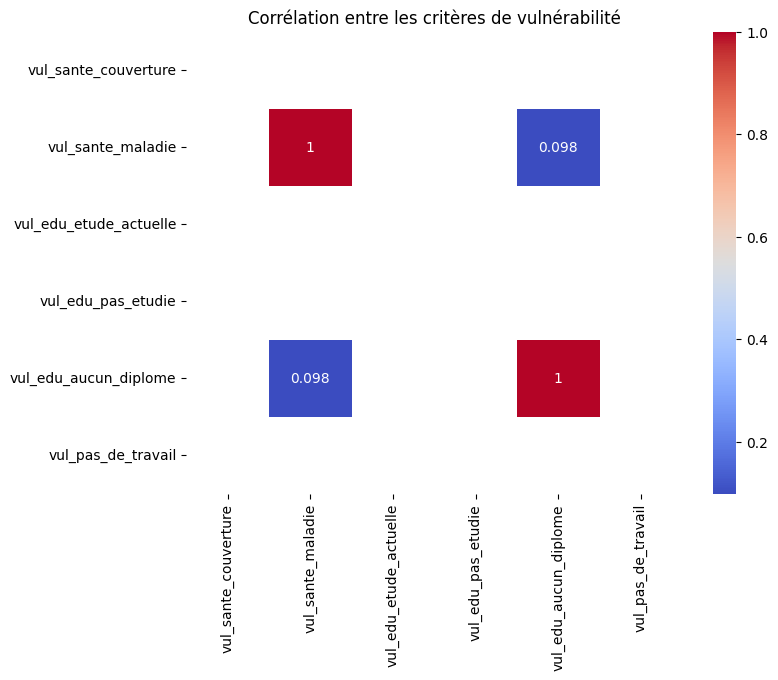

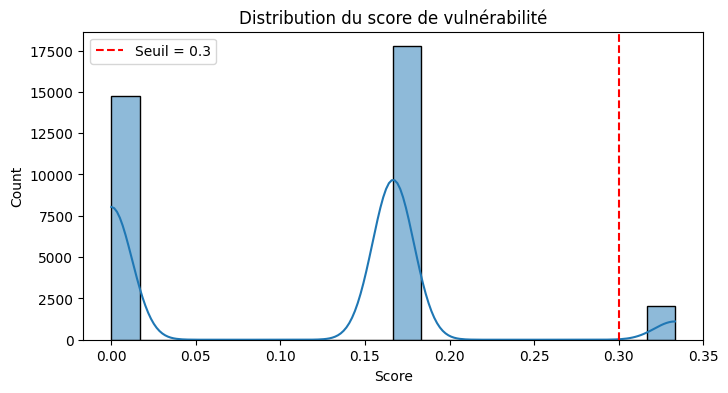

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
fichier_sav_entree = "dataset_final_cleaned.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# 1. Calcul des variables de vulnérabilité (comme dans votre code original)
df['vul_sante_couverture'] = df['V4_1'].apply(lambda x: 1 if x == 2 else 0)
df['vul_sante_maladie'] = df['V5_1AA'].apply(lambda x: 1 if x == 1 else 0)
df['vul_edu_etude_actuelle'] = df['V2_7A'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_pas_etudie'] = df['V2_7C'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_aucun_diplome'] = df['V2_10'].apply(lambda x: 1 if x == 1 else 0)
df['vul_pas_de_travail'] = df['V3_1'].apply(lambda x: 1 if x == 2 else 0)

# Calcul du score et de la vulnérabilité
n_criteres = 6
poids_egal = 1 / n_criteres
df['score_vulnerabilite'] = (
    df[['vul_sante_couverture', 'vul_sante_maladie',
        'vul_edu_etude_actuelle', 'vul_edu_pas_etudie',
        'vul_edu_aucun_diplome', 'vul_pas_de_travail']].sum(axis=1) * poids_egal
)
seuil = 0.3
df['vulnerable'] = df['score_vulnerabilite'].apply(lambda x: 1 if x >= seuil else 0)

# ----------------------------------------------------------------------
# 2. Statistiques descriptives
# ----------------------------------------------------------------------

# A. Répartition de la vulnérabilité
vuln_counts = df['vulnerable'].value_counts().reset_index()
vuln_counts.columns = ['vulnerable', 'count']
vuln_counts['percentage'] = (vuln_counts['count'] / len(df)) * 100

print("Répartition de la vulnérabilité:")
print(vuln_counts)

# B. Fréquence des critères individuels
critere_columns = [
    'vul_sante_couverture', 'vul_sante_maladie',
    'vul_edu_etude_actuelle', 'vul_edu_pas_etudie',
    'vul_edu_aucun_diplome', 'vul_pas_de_travail'
]

critere_stats = pd.DataFrame({
    'Critère': critere_columns,
    'Nombre vulnérable': df[critere_columns].sum(),
    'Pourcentage': (df[critere_columns].sum() / len(df)) * 100
})

print("\nFréquence des critères de vulnérabilité:")
print(critere_stats)

# C. Comparaison des caractéristiques par groupe (ex: âge, genre, etc.)
# Supposons que 'AGE' et 'SEXE' sont des colonnes dans votre dataset
if 'AGE' in df.columns:
    print("\nÂge moyen par groupe:")
    print(df.groupby('vulnerable')['AGE'].mean())

if 'SEXE' in df.columns:
    print("\nRépartition par sexe:")
    print(pd.crosstab(df['SEXE'], df['vulnerable'], normalize='columns') * 100)

# ----------------------------------------------------------------------
# 3. Visualisations
# ----------------------------------------------------------------------

# A. Diagramme en barres de la vulnérabilité
plt.figure(figsize=(6, 4))
sns.countplot(x='vulnerable', data=df)
plt.title("Nombre de personnes vulnérables vs non vulnérables")
plt.xlabel("Vulnérable (1 = Oui, 0 = Non)")
plt.ylabel("Nombre")
plt.show()

# B. Heatmap des corrélations entre critères
plt.figure(figsize=(8, 6))
sns.heatmap(df[critere_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les critères de vulnérabilité")
plt.show()

# C. Distribution du score de vulnérabilité
plt.figure(figsize=(8, 4))
sns.histplot(df['score_vulnerabilite'], bins=20, kde=True)
plt.axvline(seuil, color='red', linestyle='--', label=f'Seuil = {seuil}')
plt.title("Distribution du score de vulnérabilité")
plt.xlabel("Score")
plt.legend()
plt.show()

creation d une simulation de data 2019

In [21]:
from google.colab import files
uploaded = files.upload()


Saving simulation 2019.sav to simulation 2019.sav


In [23]:
import pyreadstat

df_simulation_2019, meta = pyreadstat.read_sav("simulation 2019.sav")

# Affiche un aperçu
df_simulation_2019.head()


,V1_2,V1_12,V1_13,V2_1B,V2_1C,V2_2_corrige,V2_2B_corrige,V2_7A,V2_7B,V2_7C,...,V2_19,V2_20,V3_1,V3_12_corrige,V3_13,V3_14_corrige,V3_15_corrige,V3_18,V4_1,V5_1AA
0,2.0,55.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,1.0,0.0
1,2.0,25.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,0.0
2,1.0,35.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,3.0,1.0,0.0,5.0,0.0,0.0,3.0,3.0,0.0
3,2.0,65.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,9.0,0.0
4,2.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,1.0,0.0,5.0,0.0,0.0,3.0,9.0,0.0


In [24]:
import numpy as np

df_simulation_2019['V4_1'] = df_simulation_2019['V4_1'].apply(
    lambda x: 1 if x == 0 and np.random.rand() < 0.6 else (0 if x == 1 and np.random.rand() < 0.1 else x)
)

df_simulation_2019['V5_1AA'] = df_simulation_2019['V5_1AA'].apply(
    lambda x: 0 if x == 1 and np.random.rand() < 0.2 else (1 if x == 0 and np.random.rand() < 0.05 else x)
)

df_simulation_2019['V3_1'] = df_simulation_2019['V3_1'].apply(
    lambda x: 1 if x == 0 and np.random.rand() < 0.3 else (0 if x == 1 and np.random.rand() < 0.1 else x)
)

df_simulation_2019['V2_7A'] = df_simulation_2019['V2_7A'].apply(
    lambda x: 1 if x == 0 and np.random.rand() < 0.05 else (0 if x == 1 and np.random.rand() < 0.1 else x)
)

df_simulation_2019['V2_7C'] = df_simulation_2019['V2_7C'].apply(
    lambda x: 1 if x == 0 and np.random.rand() < 0.01 else (0 if x == 1 and np.random.rand() < 0.01 else x)
)


In [25]:
df_simulation_2019['vulnerable'] = (
    (df_simulation_2019['V4_1'] == 0) |
    (df_simulation_2019['V5_1AA'] == 1) |
    ((df_simulation_2019['V2_7A'] == 0) & (df_simulation_2019['V2_7C'] == 0)) |
    (df_simulation_2019['V3_1'] == 0)
).astype(int)


Répartition de la vulnérabilité:
   vulnerable  count  percentage
0           0  20841   91.641017
1           1   1901    8.358983

Fréquence des critères de vulnérabilité:
                                       Critère  Nombre vulnérable  Pourcentage
vul_sante_couverture      vul_sante_couverture                  0     0.000000
vul_sante_maladie            vul_sante_maladie               2539    11.164365
vul_edu_etude_actuelle  vul_edu_etude_actuelle                  0     0.000000
vul_edu_pas_etudie          vul_edu_pas_etudie                  0     0.000000
vul_edu_aucun_diplome    vul_edu_aucun_diplome              15325    67.386334
vul_pas_de_travail          vul_pas_de_travail                  0     0.000000


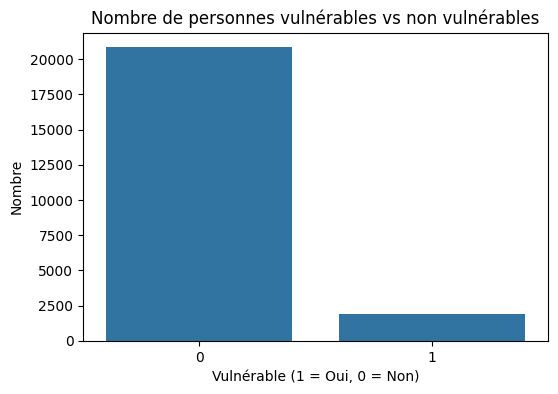

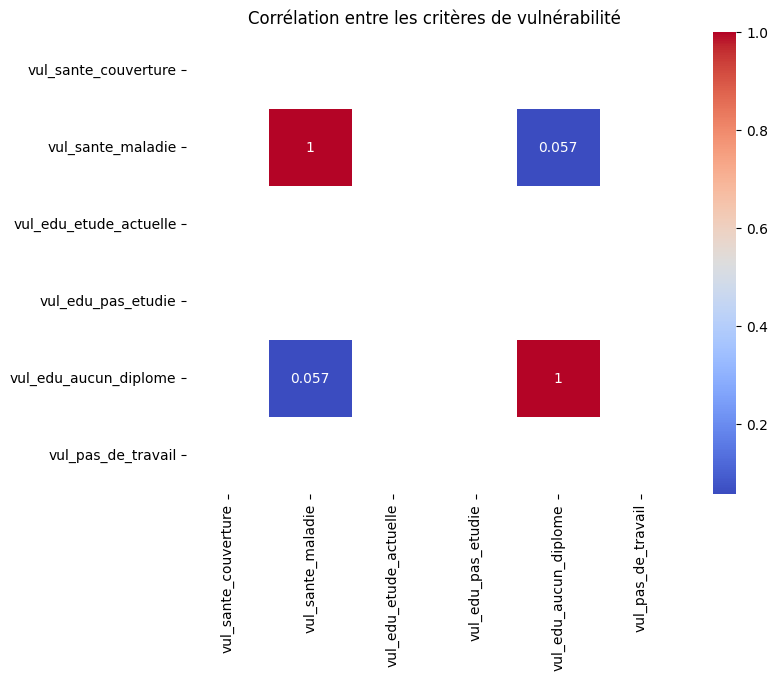

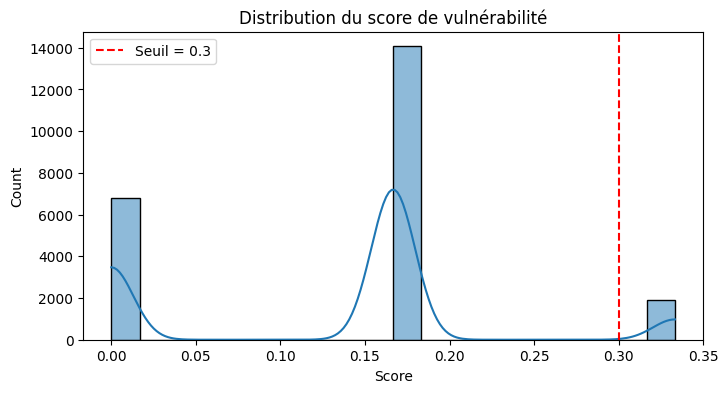

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
fichier_sav_entree = "simulation 2019.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# 1. Calcul des variables de vulnérabilité (comme dans votre code original)
df['vul_sante_couverture'] = df['V4_1'].apply(lambda x: 1 if x == 2 else 0)
df['vul_sante_maladie'] = df['V5_1AA'].apply(lambda x: 1 if x == 1 else 0)
df['vul_edu_etude_actuelle'] = df['V2_7A'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_pas_etudie'] = df['V2_7C'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_aucun_diplome'] = df['V2_10'].apply(lambda x: 1 if x == 1 else 0)
df['vul_pas_de_travail'] = df['V3_1'].apply(lambda x: 1 if x == 2 else 0)

# Calcul du score et de la vulnérabilité
n_criteres = 6
poids_egal = 1 / n_criteres
df['score_vulnerabilite'] = (
    df[['vul_sante_couverture', 'vul_sante_maladie',
        'vul_edu_etude_actuelle', 'vul_edu_pas_etudie',
        'vul_edu_aucun_diplome', 'vul_pas_de_travail']].sum(axis=1) * poids_egal
)
seuil = 0.3
df['vulnerable'] = df['score_vulnerabilite'].apply(lambda x: 1 if x >= seuil else 0)

# ----------------------------------------------------------------------
# 2. Statistiques descriptives
# ----------------------------------------------------------------------

# A. Répartition de la vulnérabilité
vuln_counts = df['vulnerable'].value_counts().reset_index()
vuln_counts.columns = ['vulnerable', 'count']
vuln_counts['percentage'] = (vuln_counts['count'] / len(df)) * 100

print("Répartition de la vulnérabilité:")
print(vuln_counts)

# B. Fréquence des critères individuels
critere_columns = [
    'vul_sante_couverture', 'vul_sante_maladie',
    'vul_edu_etude_actuelle', 'vul_edu_pas_etudie',
    'vul_edu_aucun_diplome', 'vul_pas_de_travail'
]

critere_stats = pd.DataFrame({
    'Critère': critere_columns,
    'Nombre vulnérable': df[critere_columns].sum(),
    'Pourcentage': (df[critere_columns].sum() / len(df)) * 100
})

print("\nFréquence des critères de vulnérabilité:")
print(critere_stats)

# C. Comparaison des caractéristiques par groupe (ex: âge, genre, etc.)
# Supposons que 'AGE' et 'SEXE' sont des colonnes dans votre dataset
if 'AGE' in df.columns:
    print("\nÂge moyen par groupe:")
    print(df.groupby('vulnerable')['AGE'].mean())

if 'SEXE' in df.columns:
    print("\nRépartition par sexe:")
    print(pd.crosstab(df['SEXE'], df['vulnerable'], normalize='columns') * 100)

# ----------------------------------------------------------------------
# 3. Visualisations
# ----------------------------------------------------------------------

# A. Diagramme en barres de la vulnérabilité
plt.figure(figsize=(6, 4))
sns.countplot(x='vulnerable', data=df)
plt.title("Nombre de personnes vulnérables vs non vulnérables")
plt.xlabel("Vulnérable (1 = Oui, 0 = Non)")
plt.ylabel("Nombre")
plt.show()

# B. Heatmap des corrélations entre critères
plt.figure(figsize=(8, 6))
sns.heatmap(df[critere_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les critères de vulnérabilité")
plt.show()

# C. Distribution du score de vulnérabilité
plt.figure(figsize=(8, 4))
sns.histplot(df['score_vulnerabilite'], bins=20, kde=True)
plt.axvline(seuil, color='red', linestyle='--', label=f'Seuil = {seuil}')
plt.title("Distribution du score de vulnérabilité")
plt.xlabel("Score")
plt.legend()
plt.show()

In [33]:
import pyreadstat

# Supposons que df_simulation_2019 est ton DataFrame modifié
fichier_sav_sortie = "simulation_2019_modifie.sav"

pyreadstat.write_sav(df_simulation_2019, fichier_sav_sortie)
print(f"Fichier sauvegardé sous : {fichier_sav_sortie}")


Fichier sauvegardé sous : simulation_2019_modifie.sav


In [34]:
import pyreadstat
import pandas as pd

# 1. Charger les données SPSS
fichier_sav_entree = "simulation 2019.sav"
df, meta = pyreadstat.read_sav(fichier_sav_entree)

# 2. Calcul des variables de vulnérabilité
df['vul_sante_couverture'] = df['V4_1'].apply(lambda x: 1 if x == 2 else 0)
df['vul_sante_maladie'] = df['V5_1AA'].apply(lambda x: 1 if x == 1 else 0)
df['vul_edu_etude_actuelle'] = df['V2_7A'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_pas_etudie'] = df['V2_7C'].apply(lambda x: 1 if x == 2 else 0)
df['vul_edu_aucun_diplome'] = df['V2_10'].apply(lambda x: 1 if x == 1 else 0)
df['vul_pas_de_travail'] = df['V3_1'].apply(lambda x: 1 if x == 2 else 0)

n_criteres = 6
poids_egal = 1 / n_criteres
df['score_vulnerabilite'] = (
    df[['vul_sante_couverture', 'vul_sante_maladie',
        'vul_edu_etude_actuelle', 'vul_edu_pas_etudie',
        'vul_edu_aucun_diplome', 'vul_pas_de_travail']].sum(axis=1) * poids_egal
)
seuil = 0.3
df['vulnerable'] = df['score_vulnerabilite'].apply(lambda x: 1 if x >= seuil else 0)

# 3. Sauvegarder dans un nouveau fichier SPSS avec les nouvelles variables
fichier_sav_sortie = "simulation_2019_modifie.sav"
pyreadstat.write_sav(df, fichier_sav_sortie)

print(f"Fichier sauvegardé : {fichier_sav_sortie}")


Fichier sauvegardé : simulation_2019_modifie.sav


In [35]:
print(df.columns.tolist())


['V1_2', 'V1_12', 'V1_13', 'V2_1B', 'V2_1C', 'V2_2_corrige', 'V2_2B_corrige', 'V2_7A', 'V2_7B', 'V2_7C', 'V2_7D', 'V2_8_corrigé', 'V2_9A', 'V2_9B', 'V2_10', 'V2_8A', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V3_1', 'V3_12_corrige', 'V3_13', 'V3_14_corrige', 'V3_15_corrige', 'V3_18', 'V4_1', 'V5_1AA', 'vul_sante_couverture', 'vul_sante_maladie', 'vul_edu_etude_actuelle', 'vul_edu_pas_etudie', 'vul_edu_aucun_diplome', 'vul_pas_de_travail', 'score_vulnerabilite', 'vulnerable']


In [36]:
import pyreadstat
import pandas as pd

# 1. Charger les deux fichiers SPSS
fichier1 = "simulation 2019.sav"
fichier2 = "dataset_final_cleaned.sav"

df1, meta1 = pyreadstat.read_sav(fichier1)
df2, meta2 = pyreadstat.read_sav(fichier2)

# 2. Vérifier que les colonnes sont identiques
if set(df1.columns) != set(df2.columns):
    print("Attention : Les datasets n'ont pas les mêmes colonnes.")
    print("Colonnes dataset1 :", df1.columns.tolist())
    print("Colonnes dataset2 :", df2.columns.tolist())
else:
    print("Les datasets ont les mêmes colonnes.")

    # 3. Si tu as une clé unique pour trier (par exemple 'id'), sinon juste reset index
    if 'id' in df1.columns and 'id' in df2.columns:
        df1_sorted = df1.sort_values(by='id').reset_index(drop=True)
        df2_sorted = df2.sort_values(by='id').reset_index(drop=True)
    else:
        df1_sorted = df1.reset_index(drop=True)
        df2_sorted = df2.reset_index(drop=True)

    # 4. Vérifier qu'ils ont la même forme
    if df1_sorted.shape != df2_sorted.shape:
        print("Les datasets n'ont pas la même forme :", df1_sorted.shape, "vs", df2_sorted.shape)
    else:
        # 5. Comparaison élément par élément
        egal = df1_sorted.equals(df2_sorted)
        if egal:
            print("Les deux datasets ont exactement les mêmes données.")
        else:
            print("Les datasets ont des différences dans les données.")
            differences = (df1_sorted != df2_sorted)
            lignes_diff = differences.any(axis=1)
            print(f"Nombre de lignes avec différences : {lignes_diff.sum()}")

            # Affichage des colonnes différentes pour quelques lignes
            for idx in df1_sorted.index[lignes_diff][:5]:  # affiche max 5 lignes différentes
                colonnes_diff = differences.columns[differences.loc[idx]]
                print(f"Ligne {idx} diffère dans les colonnes : {list(colonnes_diff)}")


Attention : Les datasets n'ont pas les mêmes colonnes.
Colonnes dataset1 : ['V1_2', 'V1_12', 'V1_13', 'V2_1B', 'V2_1C', 'V2_2_corrige', 'V2_2B_corrige', 'V2_7A', 'V2_7B', 'V2_7C', 'V2_7D', 'V2_8_corrigé', 'V2_9A', 'V2_9B', 'V2_10', 'V2_8A', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V3_1', 'V3_12_corrige', 'V3_13', 'V3_14_corrige', 'V3_15_corrige', 'V3_18', 'V4_1', 'V5_1AA']
Colonnes dataset2 : ['V1_2', 'V1_3', 'V1_4', 'V1_12', 'V1_13', 'V1_15', 'V1_15_first', 'V1_21', 'V1_22', 'V1_14_2015', 'V1_0S', 'V1_9_17S', 'V1_2A', 'V1_3A', 'V1_14BS', 'V1_21S', 'V1_22S', 'V2A_1', 'V2_1B', 'V2_1C', 'V2_2', 'V2_2_corrige', 'V2_2B', 'V2_2B_corrige', 'V2_3', 'V2_4', 'V2_5', 'V2_6A', 'V2_6B', 'V2_7A', 'V2_7B', 'V2_7C', 'V2_7D', 'V2_8', 'V2_8_corrigé', 'V2_9A', 'V2_9B', 'V2_10', 'V2_11', 'V2_12', 'V2_13', 'NUML2AS', 'V2A_1AS', 'V2_8A', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V2_21', 'V3_0A', 'V3_1', 'V3_1A', 'V3_5', 'V3_6', 'V3_7', 'V3_7L', 'V3_8', 'V3_9', 'V3_9L', 'V3_9A', 'V3_10', 'V3_12', 'V3_12_corrige', 'V